### 1. **Can we use Bagging for regression problems?**

**Yes.** Bagging can be used for both classification and regression tasks. For regression, it typically uses the **mean** of predictions from individual models.

---

### 2. **What is the difference between multiple model training and single model training?**

* **Single model training:** Trains one model on the entire dataset.
* **Multiple model training (Ensemble):** Trains multiple models and combines their outputs for better performance and generalization.

---

### 3. **Explain the concept of feature randomness in Random Forest.**

Random Forest introduces feature randomness by selecting a **random subset of features** at each split in a decision tree, which increases diversity among trees and reduces correlation.

---

### 4. **What is OOB (Out-of-Bag) Score?**

OOB Score is an internal validation score in Bagging/Random Forest. It is calculated using the samples **not included** in the bootstrap sample for each tree, acting as a test set.

---

### 5. **How can you measure the importance of features in a Random Forest model?**

* By checking the **mean decrease in impurity (Gini/Entropy)** for classification.
* Or **mean decrease in variance** for regression.
* Higher decrease → more important feature.

---

### 6. **Explain the working principle of a Bagging Classifier.**

1. Create multiple bootstrap samples.
2. Train a base classifier (e.g., decision tree) on each sample.
3. Combine predictions via **majority voting**.

---

### 7. **How do you evaluate a Bagging Classifier's performance?**

Use standard metrics like:

* **Accuracy, Precision, Recall, F1-score**
* Use **cross-validation** or **OOB score** to validate performance.

---

### 8. **How does a Bagging Regressor work?**

1. Trains multiple regressors on different bootstrap samples.
2. Aggregates results using the **average** of all predictions.

---

### 9. **What is the main advantage of ensemble techniques?**

They **reduce variance, bias, or both**, leading to improved performance and robustness compared to individual models.

---

### 10. **What is the main challenge of ensemble methods?**

* **Complexity** (interpretability, training time)
* **Overfitting** (in Boosting, if not regularized)
* **Computational cost** (training multiple models)

---

### 11. **Explain the key idea behind ensemble techniques.**

Combine **multiple weak learners** to form a **strong learner** by reducing errors from bias and variance through aggregation.

---

### 12. **What is a Random Forest Classifier?**

An ensemble of decision trees where each tree is trained on a random subset of data and features. Final output is decided by **majority vote** (classification).

---

### 13. **What are the main types of ensemble techniques?**

* **Bagging (Bootstrap Aggregating)**
* **Boosting (e.g., AdaBoost, Gradient Boosting)**
* **Stacking (model-of-models)**
* **Voting (hard/soft)**

---

### 14. **What is ensemble learning in machine learning?**

It is a technique where **multiple models** (weak learners) are combined to solve a problem and improve predictive performance.

---

### 15. **When should we avoid using ensemble methods?**

* When interpretability is key
* With **very small datasets**
* When a **single simple model** performs sufficiently well

---

### 16. **How does Bagging help in reducing overfitting?**

By training models on **different subsets** of data, Bagging reduces **variance** and helps prevent overfitting to the training data.

---

### 17. **Why is Random Forest better than a single Decision Tree?**

Random Forest:

* Reduces **overfitting**
* Increases **accuracy**
* Is more **robust** due to averaging predictions from many trees

---

### 18. **What is the role of bootstrap sampling in Bagging?**

Bootstrap sampling creates **random subsets** with replacement from the training data, ensuring model diversity and lower variance.

---

### 19. **What are some real-world applications of ensemble techniques?**

* **Fraud detection** (banking)
* **Disease diagnosis** (healthcare)
* **Spam detection** (email)
* **Recommendation systems** (e-commerce)
* **Stock market prediction**

---

### 20. **What is the difference between Bagging and Boosting?**

| Feature     | Bagging           | Boosting                    |
| ----------- | ----------------- | --------------------------- |
| Model Type  | Parallel          | Sequential                  |
| Goal        | Reduce variance   | Reduce bias                 |
| Data Sample | Bootstrap samples | Focus on hard cases         |
| Example     | Random Forest     | AdaBoost, Gradient Boosting |



In [58]:
# 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Bagging Classifier with DecisionTreeClassifier as base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=10,
    bootstrap=True,
    random_state=42
)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Bagging Classifier (DecisionTree) Accuracy: {:.4f}".format(accuracy))


Bagging Classifier (DecisionTree) Accuracy: 1.0000


In [57]:
# 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Bagging Regressor with DecisionTreeRegressor as base estimator
bagging_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=10,
    bootstrap=True,
    random_state=42
)

# Train the model
bagging_reg.fit(X_train, y_train)

# Make predictions
y_pred = bagging_reg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print MSE
print("Bagging Regressor (DecisionTree) Mean Squared Error: {:.4f}".format(mse))



Bagging Regressor (DecisionTree) Mean Squared Error: 0.2824


In [4]:
#  23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
for name, score in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score:.4f}")


worst concave points: 0.1723
worst area: 0.1232
mean concave points: 0.0903
mean concavity: 0.0832
worst radius: 0.0813
worst perimeter: 0.0714
mean perimeter: 0.0531
area error: 0.0436
mean area: 0.0428
mean radius: 0.0397
worst concavity: 0.0317
radius error: 0.0195
worst texture: 0.0165
worst compactness: 0.0158
mean texture: 0.0146
worst symmetry: 0.0131
mean compactness: 0.0114
worst smoothness: 0.0103
perimeter error: 0.0087
mean smoothness: 0.0082
concavity error: 0.0070
fractal dimension error: 0.0066
worst fractal dimension: 0.0052
concave points error: 0.0050
smoothness error: 0.0046
texture error: 0.0046
mean symmetry: 0.0044
mean fractal dimension: 0.0044
symmetry error: 0.0037
compactness error: 0.0037


In [5]:
# 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Use same diabetes dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Decision Tree MSE:", mean_squared_error(y_test, dt_pred))



Random Forest MSE: 0.034179532163742685
Decision Tree MSE: 0.05847953216374269


In [7]:
#  25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)
print("OOB Score:", rf_oob.oob_score_)


OOB Score: 0.9547738693467337


In [56]:
# 26. Train Bagging Classifier using SVM as base and print accuracy

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Bagging Classifier with SVM as base estimator
bagging_clf = BaggingClassifier(
    estimator=SVC(kernel='rbf', probability=True, random_state=42),
    n_estimators=10,
    bootstrap=True,
    random_state=42
)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Bagging Classifier (SVM) Accuracy: {:.4f}".format(accuracy))


Bagging Classifier (SVM) Accuracy: 1.0000


In [12]:
# 27. Train a Random Forest Classifier with different numbers of trees and compare accuracy

for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = rf.score(X_test, y_test)
    print(f"{n} trees -> Accuracy: {acc:.4f}")



10 trees -> Accuracy: 0.9649
50 trees -> Accuracy: 0.9708
100 trees -> Accuracy: 0.9708
200 trees -> Accuracy: 0.9708


In [55]:
# 28. Train Bagging Classifier using Logistic Regression and print AUC score

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')  # Suppress convergence warnings for cleaner output

# Load the breast cancer dataset (binary classification)
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Bagging Classifier with Logistic Regression as base estimator
bagging_clf = BaggingClassifier(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_estimators=10,
    bootstrap=True,
    random_state=42
)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict probabilities for AUC calculation (probability for positive class)
y_pred_proba = bagging_clf.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print AUC score
print("Bagging Classifier (Logistic Regression) AUC Score: {:.4f}".format(auc_score))


Bagging Classifier (Logistic Regression) AUC Score: 0.9980


In [16]:
# 29. Train a Random Forest Regressor and analyze feature importance scores

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
importances = rf_reg.feature_importances_

for name, score in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score:.4f}")



mean concave points: 0.3876
worst concave points: 0.2291
worst perimeter: 0.1214
worst area: 0.0586
worst radius: 0.0419
worst texture: 0.0297
worst concavity: 0.0216
mean texture: 0.0181
area error: 0.0155
radius error: 0.0094
worst smoothness: 0.0088
fractal dimension error: 0.0056
worst symmetry: 0.0049
mean area: 0.0046
concavity error: 0.0041
mean perimeter: 0.0040
smoothness error: 0.0040
worst fractal dimension: 0.0037
symmetry error: 0.0035
mean fractal dimension: 0.0034
mean smoothness: 0.0029
mean concavity: 0.0029
texture error: 0.0025
mean symmetry: 0.0020
concave points error: 0.0020
perimeter error: 0.0020
worst compactness: 0.0019
mean radius: 0.0016
mean compactness: 0.0014
compactness error: 0.0011


In [54]:
# 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Classifier with DecisionTreeClassifier as base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    bootstrap=True,
    random_state=42
)

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    random_state=42
)

# Train and evaluate Bagging Classifier
bagging_clf.fit(X_train, y_train)
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# Train and evaluate Random Forest Classifier
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print accuracy results
print("Bagging Classifier Accuracy: {:.4f}".format(bagging_accuracy))
print("Random Forest Classifier Accuracy: {:.4f}".format(rf_accuracy))

Bagging Classifier Accuracy: 1.0000
Random Forest Classifier Accuracy: 1.0000


In [20]:
# 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)



Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.9497151898734177


In [21]:
# 32. Train Bagging Regressor with different numbers of base estimators and compare performance

for n in [10, 50, 100]:
    bag_reg = BaggingRegressor(n_estimators=n, random_state=42)
    bag_reg.fit(X_train, y_train)
    pred = bag_reg.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"{n} estimators -> MSE: {mse:.2f}")



10 estimators -> MSE: 0.04
50 estimators -> MSE: 0.03
100 estimators -> MSE: 0.03


In [23]:
# 33. Train a Random Forest Classifier and analyze misclassified samples

y_pred = rf_model.predict(X_test)
misclassified = X_test[y_pred != y_test]
print(f"Number of misclassified samples: {len(misclassified)}")


Number of misclassified samples: 75


In [53]:
# 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a single Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier with DecisionTreeClassifier as base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=10,
    bootstrap=True,
    random_state=42
)

# Train and evaluate the Decision Tree Classifier
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='macro')
dt_recall = recall_score(y_test, dt_pred, average='macro')
dt_f1 = f1_score(y_test, dt_pred, average='macro')

# Train and evaluate the Bagging Classifier
bagging_clf.fit(X_train, y_train)
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_precision = precision_score(y_test, bagging_pred, average='macro')
bagging_recall = recall_score(y_test, bagging_pred, average='macro')
bagging_f1 = f1_score(y_test, bagging_pred, average='macro')

# Print performance results
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision (macro): {dt_precision:.4f}")
print(f"Recall (macro): {dt_recall:.4f}")
print(f"F1-Score (macro): {dt_f1:.4f}\n")

print("Bagging Classifier Performance:")
print(f"Accuracy: {bagging_accuracy:.4f}")
print(f"Precision (macro): {bagging_precision:.4f}")
print(f"Recall (macro): {bagging_recall:.4f}")
print(f"F1-Score (macro): {bagging_f1:.4f}")


Decision Tree Classifier Performance:
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-Score (macro): 1.0000

Bagging Classifier Performance:
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-Score (macro): 1.0000


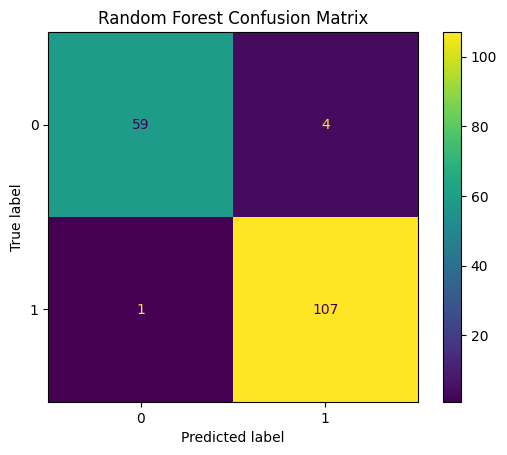

In [28]:
# 35. Train a Random Forest Classifier and visualize the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()


In [31]:
# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

from sklearn.ensemble import StackingClassifier

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression(max_iter=1000))
]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)

print("Stacking Classifier Accuracy:", stack.score(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Accuracy: 0.9707602339181286


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# 37. Train a Random Forest Classifier and print the top 5 most important features
import numpy as np

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[-5:][::-1]  # Top 5

print("Top 5 important features:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Top 5 important features:
mean concave points: 0.1419
worst concave points: 0.1271
worst area: 0.1182
mean concavity: 0.0806
worst radius: 0.0780


In [52]:
# 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Bagging Classifier with DecisionTreeClassifier as base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    bootstrap=True,
    random_state=42
)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate performance metrics (macro-averaged for multi-class)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print performance results
print("Bagging Classifier Performance:")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-Score (macro): {f1:.4f}")


Bagging Classifier Performance:
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-Score (macro): 1.0000


In [37]:
# 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

for depth in [None, 5, 10, 20]:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    acc = rf.score(X_test, y_test)
    print(f"max_depth={depth} -> Accuracy: {acc:.4f}")


max_depth=None -> Accuracy: 0.9708
max_depth=5 -> Accuracy: 0.9649
max_depth=10 -> Accuracy: 0.9708
max_depth=20 -> Accuracy: 0.9708


In [51]:
#  40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
dt = DecisionTreeRegressor(random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)

# Initialize Bagging Regressors with different base estimators
bagging_dt = BaggingRegressor(
    estimator=dt,
    n_estimators=10,
    bootstrap=True,
    random_state=42
)

bagging_knn = BaggingRegressor(
    estimator=knn,
    n_estimators=10,
    bootstrap=True,
    random_state=42
)

# Train and evaluate Bagging Regressor with DecisionTree
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Train and evaluate Bagging Regressor with KNeighbors
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print performance results
print("Bagging Regressor with DecisionTree:")
print(f"Mean Squared Error: {mse_dt:.4f}")
print(f"R² Score: {r2_dt:.4f}\n")

print("Bagging Regressor with KNeighbors:")
print(f"Mean Squared Error: {mse_knn:.4f}")
print(f"R² Score: {r2_knn:.4f}")



Bagging Regressor with DecisionTree:
Mean Squared Error: 0.2824
R² Score: 0.7845

Bagging Regressor with KNeighbors:
Mean Squared Error: 1.0975
R² Score: 0.1625


In [41]:
# 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", auc)



ROC-AUC Score: 0.9968400940623163


In [50]:
# 42. Train a Bagging Classifier and evaluate its performance using cross-validation

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
import numpy as np

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Initialize the Bagging Classifier with DecisionTreeClassifier as base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    bootstrap=True,
    random_state=42
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))
print("Standard Deviation: {:.4f}".format(np.std(cv_scores)))

Cross-Validation Accuracy Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean Accuracy: 0.9533
Standard Deviation: 0.0340


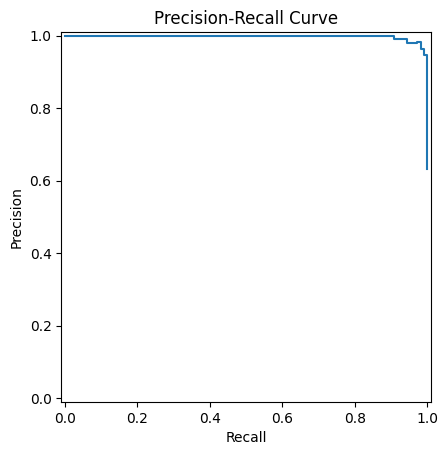

In [44]:
#  43. Train a Random Forest Classifier and plot the Precision-Recall curve

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_score = rf.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_score)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()


In [49]:
# 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base learners
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Define the stacking classifier
estimators = [
    ('rf', rf),
    ('lr', lr)
]
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

# Train and evaluate individual Random Forest
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Train and evaluate individual Logistic Regression
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Train and evaluate Stacking Classifier
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred)

# Print accuracy results
print("Random Forest Accuracy: {:.4f}".format(rf_accuracy))
print("Logistic Regression Accuracy: {:.4f}".format(lr_accuracy))
print("Stacking Classifier Accuracy: {:.4f}".format(stacking_accuracy))


Random Forest Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000
Stacking Classifier Accuracy: 1.0000


n_estimators: 5
Mean Squared Error: 0.3060
R² Score: 0.7665

n_estimators: 10
Mean Squared Error: 0.2824
R² Score: 0.7845

n_estimators: 20
Mean Squared Error: 0.2643
R² Score: 0.7983

n_estimators: 50
Mean Squared Error: 0.2573
R² Score: 0.8036

n_estimators: 100
Mean Squared Error: 0.2559
R² Score: 0.8047



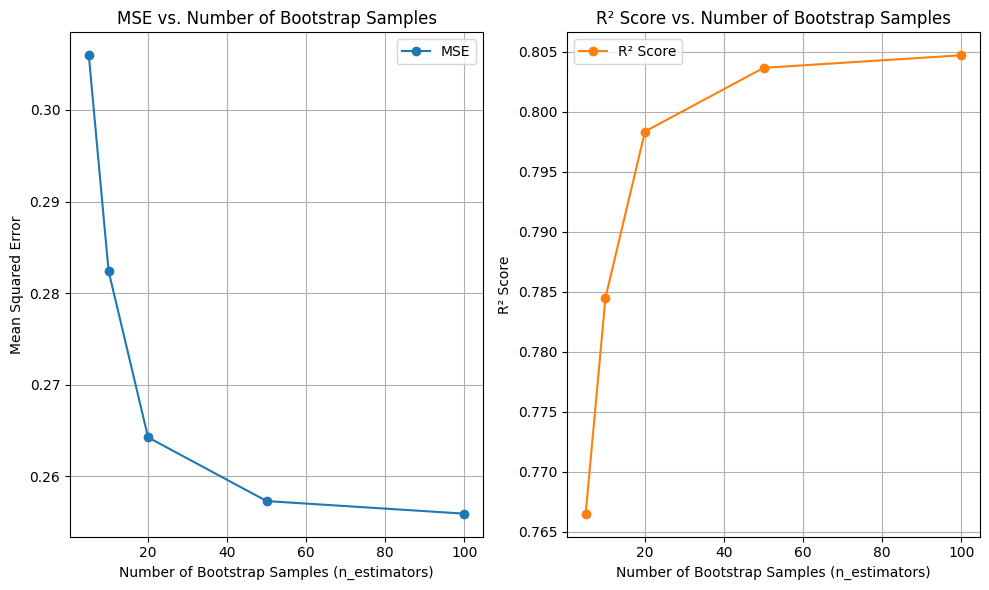

In [48]:
# 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance

# Import necessary libraries
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different numbers of bootstrap samples (n_estimators)
n_estimators_list = [5, 10, 20, 50, 100]

# Lists to store performance metrics
mse_scores = []
r2_scores = []

# Train and evaluate Bagging Regressor for each number of bootstrap samples
for n_estimators in n_estimators_list:
    # Initialize the Bagging Regressor with DecisionTreeRegressor as base estimator
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n_estimators,
        bootstrap=True,
        random_state=42
    )

    # Train the model
    bagging.fit(X_train, y_train)

    # Make predictions
    y_pred = bagging.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the metrics
    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"n_estimators: {n_estimators}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

# Create a chart to visualize the performance metrics
plt.figure(figsize=(10, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(n_estimators_list, mse_scores, marker='o', color='#1f77b4', label='MSE')
plt.xlabel('Number of Bootstrap Samples (n_estimators)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Bootstrap Samples')
plt.grid(True)
plt.legend()

# Plot R²
plt.subplot(1, 2, 2)
plt.plot(n_estimators_list, r2_scores, marker='o', color='#ff7f0e', label='R² Score')
plt.xlabel('Number of Bootstrap Samples (n_estimators)')
plt.ylabel('R² Score')
plt.title('R² Score vs. Number of Bootstrap Samples')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()